# Basic Usage

This tutorial covers some basic usage patterns and best practices to help you get started with Matplotlib.

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

# A simple example

Matplotlib graphs your data on Figures (e.g., windows, Jupyter widgets, etc.), each of which can contain one or more Axes, an area where points can be specified in terms of x-y coordinates (or theta-r in a polar plot, x-y-z in a 3D plot, etc). The simplest way of creating a Figure with an Axes is using pyplot.subplots. We can then use Axes.plot to draw some data on the Axes:

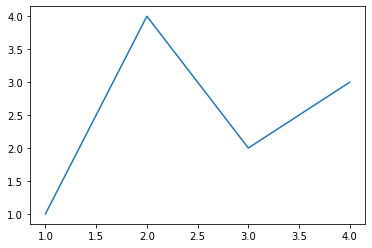

In [5]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.plot([1, 2, 3, 4], [1, 4, 2, 3]);  # Plot some data on the axes.

Figure

The whole figure. The Figure keeps track of all the child Axes, a group of 'special' Artists (titles, figure legends, colorbars, etc), and even nested subfigures.

The easiest way to create a new Figure is with pyplot:

<Figure size 432x288 with 0 Axes>

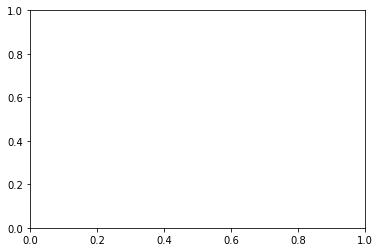

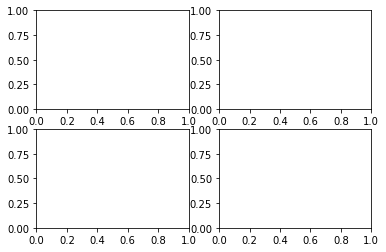

In [6]:
fig = plt.figure()  # an empty figure with no Axes
fig, ax = plt.subplots()  # a figure with a single Axes
fig, axs = plt.subplots(2, 2)  # a figure with a 2x2 grid of Axes

It is often convenient to create the Axes together with the Figure, but you can also manually add Axes later on. Note that many Matplotlib backends support zooming and panning on figure windows.

Parts of a Figure
Here are the components of a Matplotlib Figure.



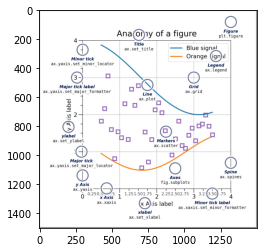

In [9]:
# Python program to read
# image using matplotlib
 
# importing matplotlib modules
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
 
# Read Images
img = mpimg.imread('anatomy.jpg')
 
# Output Images
plt.imshow(img)

# Coding styles

The object-oriented and the pyplot interfaces
As noted above, there are essentially two ways to use Matplotlib:

    Explicitly create Figures and Axes, and call methods on them (the "object-oriented (OO) style").
    Rely on pyplot to automatically create and manage the Figures and Axes, and use pyplot functions for plotting.

So one can use the OO-style

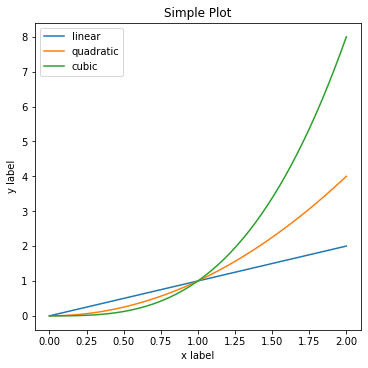

In [15]:
x = np.linspace(0, 2, 50)  # Sample data.

# Note that even in the OO-style, we use `.pyplot.figure` to create the Figure.
fig, ax = plt.subplots(figsize=(5, 5), layout='constrained')
ax.plot(x, x, label='linear')  # Plot some data on the axes.
ax.plot(x, x**2, label='quadratic')  # Plot more data on the axes...
ax.plot(x, x**3, label='cubic')  # ... and some more.
ax.set_xlabel('x label')  # Add an x-label to the axes.
ax.set_ylabel('y label')  # Add a y-label to the axes.
ax.set_title("Simple Plot")  # Add a title to the axes.
ax.legend();  # Add a legend.

or the pyplot-style:

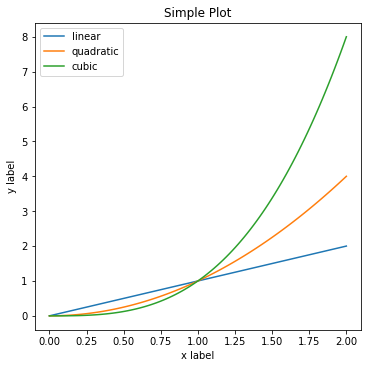

In [14]:
x = np.linspace(0, 2, 100)  # Sample data.

plt.figure(figsize=(5, 5), layout='constrained')
plt.plot(x, x, label='linear')  # Plot some data on the (implicit) axes.
plt.plot(x, x**2, label='quadratic')  # etc.
plt.plot(x, x**3, label='cubic')
plt.xlabel('x label')
plt.ylabel('y label')
plt.title("Simple Plot")
plt.legend();

## Making a helper functions

If you need to make the same plots over and over again with different data sets, or want to easily wrap Matplotlib methods, use the recommended signature function below.

In [16]:
def my_plotter(ax, data1, data2, param_dict):
    """
    A helper function to make a graph.
    """
    out = ax.plot(data1, data2, **param_dict)
    return out

which you would then use twice to populate two subplots:

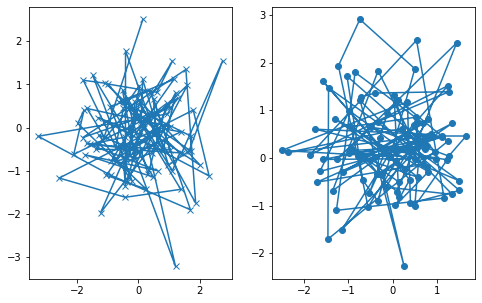

In [19]:
data1, data2, data3, data4 = np.random.randn(4, 100)  # make 4 random data sets
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 5))
my_plotter(ax1, data1, data2, {'marker': 'x'})
my_plotter(ax2, data3, data4, {'marker': 'o'});

# Styling Artists

Most plotting methods have styling options for the Artists, accessible either when a plotting method is called, or from a "setter" on the Artist. In the plot below we manually set the color, linewidth, and linestyle of the Artists created by plot, and we set the linestyle of the second line after the fact with set_linestyle.

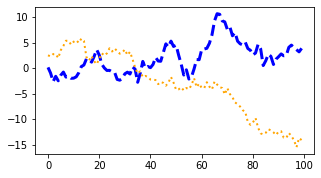

In [20]:
fig, ax = plt.subplots(figsize=(5, 2.7))
x = np.arange(len(data1))
ax.plot(x, np.cumsum(data1), color='blue', linewidth=3, linestyle='--')
l, = ax.plot(x, np.cumsum(data2), color='orange', linewidth=2)
l.set_linestyle(':');

# Colors

Matplotlib has a very flexible array of colors that are accepted for most Artists; see the colors tutorial for a list of specifications. Some Artists will take multiple colors. i.e. for a scatter plot, the edge of the markers can be different colors from the interior:

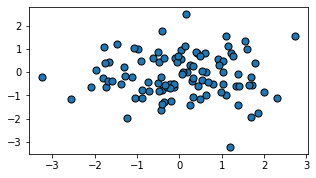

In [21]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.scatter(data1, data2, s=50, facecolor='C0', edgecolor='k');

# Linewidths, linestyles, and markersizes

Line widths are typically in typographic points (1 pt = 1/72 inch) and available for Artists that have stroked lines. Similarly, stroked lines can have a linestyle. See the linestyles example.

Marker size depends on the method being used. plot specifies markersize in points, and is generally the "diameter" or width of the marker. scatter specifies markersize as approximately proportional to the visual area of the marker. There is an array of markerstyles available as string codes (see markers), or users can define their own MarkerStyle (see Marker reference):

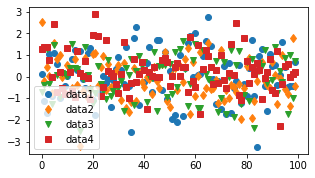

In [22]:
fig, ax = plt.subplots(figsize=(5, 2.7))
ax.plot(data1, 'o', label='data1')
ax.plot(data2, 'd', label='data2')
ax.plot(data3, 'v', label='data3')
ax.plot(data4, 's', label='data4')
ax.legend();

Labelling plots

Axes labels and text

set_xlabel, set_ylabel, and set_title are used to add text in the indicated locations (see Text in Matplotlib Plots for more discussion). Text can also be directly added to plots using text:

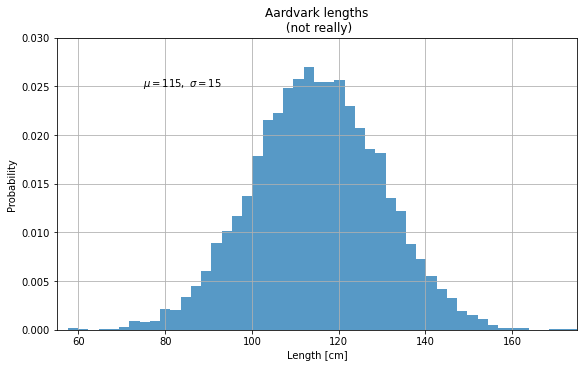

In [24]:
mu, sigma = 115, 15
x = mu + sigma * np.random.randn(10000)
fig, ax = plt.subplots(figsize=(8, 5), layout='constrained')
# the histogram of the data
n, bins, patches = ax.hist(x, 50, density=1, facecolor='C0', alpha=0.75)

ax.set_xlabel('Length [cm]')
ax.set_ylabel('Probability')
ax.set_title('Aardvark lengths\n (not really)')
ax.text(75, .025, r'$\mu=115,\ \sigma=15$')
ax.axis([55, 175, 0, 0.03])
ax.grid(True);

All of the text functions return a matplotlib.text.Text instance. Just as with lines above, you can customize the properties by passing keyword arguments into the text functions:

In [25]:
t = ax.set_xlabel('my data', fontsize=14, color='red')

Annotations

We can also annotate points on a plot, often by connecting an arrow pointing to xy, to a piece of text at xytext:

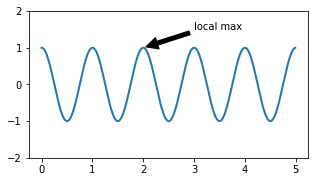

In [26]:
fig, ax = plt.subplots(figsize=(5, 2.7))

t = np.arange(0.0, 5.0, 0.01)
s = np.cos(2 * np.pi * t)
line, = ax.plot(t, s, lw=2)

ax.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05))

ax.set_ylim(-2, 2);

In this basic example, both xy and xytext are in data coordinates. There are a variety of other coordinate systems one can choose -- see Basic annotation and Advanced Annotations for details. More examples also can be found in Annotating Plots.

Legends

Often we want to identify lines or markers with a Axes.legend:

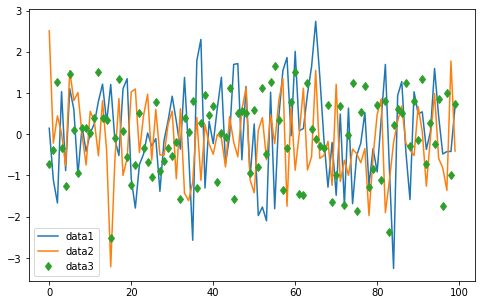

In [30]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(np.arange(len(data1)), data1, label='data1')
ax.plot(np.arange(len(data2)), data2, label='data2')
ax.plot(np.arange(len(data3)), data3, 'd', label='data3')
ax.legend();

Scales

In addition to the linear scale, Matplotlib supplies non-linear scales, such as a log-scale. Since log-scales are used so much there are also direct methods like loglog, semilogx, and semilogy. There are a number of scales (see Scales for other examples). Here we set the scale manually:

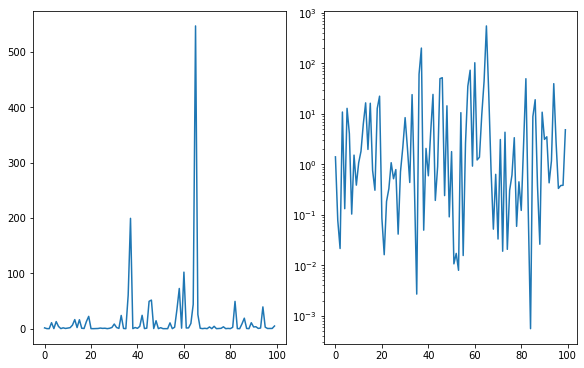

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(8, 5), layout='constrained')
xdata = np.arange(len(data1))  # make an ordinal for this
data = 10**data1
axs[0].plot(xdata, data)

axs[1].set_yscale('log')
axs[1].plot(xdata, data);

The scale sets the mapping from data values to spacing along the Axis. This happens in both directions, and gets combined into a transform, which is the way that Matplotlib maps from data coordinates to Axes, Figure, or screen coordinates. See Transformations Tutorial.